In [ ]:
# Run the mp_setup.sh bash file (I wasnt sure if we wanted to keep using a notebook)
# Will install mediapipe to the global env

In [10]:
#@markdown To better demonstrate the Pose Landmarker API, we have created a set of visualization tools that will be used in this colab. These will draw the landmarks on a detect person, as well as the expected connections between those markers.

from mediapipe import solutions
from mediapipe.framework.formats import landmark_pb2
import numpy as np


def draw_landmarks_on_image(rgb_image, detection_result):
  pose_landmarks_list = detection_result.pose_landmarks
  annotated_image = np.copy(rgb_image)

  # Loop through the detected poses to visualize.
  for idx in range(len(pose_landmarks_list)):
    pose_landmarks = pose_landmarks_list[idx]

    # Draw the pose landmarks.
    pose_landmarks_proto = landmark_pb2.NormalizedLandmarkList()
    pose_landmarks_proto.landmark.extend([
      landmark_pb2.NormalizedLandmark(x=landmark.x, y=landmark.y, z=landmark.z) for landmark in pose_landmarks
    ])
    solutions.drawing_utils.draw_landmarks(
      annotated_image,
      pose_landmarks_proto,
      solutions.pose.POSE_CONNECTIONS,
      solutions.drawing_styles.get_default_pose_landmarks_style())
  return annotated_image


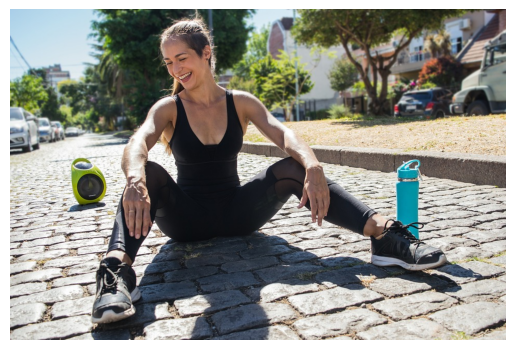

In [11]:
import cv2
import matplotlib.pyplot as plt


def cv2_imshow(image):
    """
    Display an image using matplotlib in Jupyter Notebook.

    Args:
        image: The image to display. Should be in BGR format (OpenCV default).
    """
    # Convert the image from BGR (OpenCV default) to RGB (matplotlib default)
    img_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Display the image using matplotlib
    plt.imshow(img_rgb)
    plt.axis('off')  # Hide the axis
    plt.show()

girl_img = cv2.imread("sample-frames/mp_example.png")
cv2_imshow(girl_img)

### **Media Pipeline**

In [13]:
import mediapipe as mp
from mediapipe.tasks import python
from mediapipe.tasks.python import vision

def mp_init_detector(model_path='mp-model/pose_landmarker.task'):
    # STEP 2: Create a PoseLandmarker object.
    base_options = python.BaseOptions(model_asset_path=model_path)
    options = vision.PoseLandmarkerOptions(
        base_options=base_options,
        output_segmentation_masks=True)
    return vision.PoseLandmarker.create_from_options(options)

def mp_process_image(detector, mp_img):
    # Detect features in image
    detection_result = detector.detect(mp_img)

    # Associate enums with string values
    body_parts_dict = {
        'nose': mp.solutions.pose.PoseLandmark.NOSE,
        'left_eye_inner': mp.solutions.pose.PoseLandmark.LEFT_EYE_INNER,
        'left_eye': mp.solutions.pose.PoseLandmark.LEFT_EYE,
        'left_eye_outer': mp.solutions.pose.PoseLandmark.LEFT_EYE_OUTER,
        'right_eye_inner': mp.solutions.pose.PoseLandmark.RIGHT_EYE_INNER,
        'right_eye': mp.solutions.pose.PoseLandmark.RIGHT_EYE,
        'right_eye_outer': mp.solutions.pose.PoseLandmark.RIGHT_EYE_OUTER,
        'left_ear': mp.solutions.pose.PoseLandmark.LEFT_EAR,
        'right_ear': mp.solutions.pose.PoseLandmark.RIGHT_EAR,
        'mouth_left': mp.solutions.pose.PoseLandmark.MOUTH_LEFT,
        'mouth_right': mp.solutions.pose.PoseLandmark.MOUTH_RIGHT,
        'left_shoulder': mp.solutions.pose.PoseLandmark.LEFT_SHOULDER,
        'right_shoulder': mp.solutions.pose.PoseLandmark.RIGHT_SHOULDER,
        'left_elbow': mp.solutions.pose.PoseLandmark.LEFT_ELBOW,
        'right_elbow': mp.solutions.pose.PoseLandmark.RIGHT_ELBOW,
        'left_wrist': mp.solutions.pose.PoseLandmark.LEFT_WRIST,
        'right_wrist': mp.solutions.pose.PoseLandmark.RIGHT_WRIST,
        'left_pinky': mp.solutions.pose.PoseLandmark.LEFT_PINKY,
        'right_pinky': mp.solutions.pose.PoseLandmark.RIGHT_PINKY,
        'left_index': mp.solutions.pose.PoseLandmark.LEFT_INDEX,
        'right_index': mp.solutions.pose.PoseLandmark.RIGHT_INDEX,
        'left_thumb': mp.solutions.pose.PoseLandmark.LEFT_THUMB,
        'right_thumb': mp.solutions.pose.PoseLandmark.RIGHT_THUMB,
        'left_hip': mp.solutions.pose.PoseLandmark.LEFT_HIP,
        'right_hip': mp.solutions.pose.PoseLandmark.RIGHT_HIP,
        'left_knee': mp.solutions.pose.PoseLandmark.LEFT_KNEE,
        'right_knee': mp.solutions.pose.PoseLandmark.RIGHT_KNEE,
        'left_ankle': mp.solutions.pose.PoseLandmark.LEFT_ANKLE,
        'right_ankle': mp.solutions.pose.PoseLandmark.RIGHT_ANKLE,
        'left_heel': mp.solutions.pose.PoseLandmark.LEFT_HEEL,
        'right_heel': mp.solutions.pose.PoseLandmark.RIGHT_HEEL,
        'left_foot_index': mp.solutions.pose.PoseLandmark.LEFT_FOOT_INDEX,
        'right_foot_index': mp.solutions.pose.PoseLandmark.RIGHT_FOOT_INDEX
    }

    # Create a dictonary so we can index into body parts
    # EX Usage: body_parts['ankle_left]
    body_parts = {}
    if detection_result.pose_landmarks:
        for pose_landmarks in detection_result.pose_landmarks:
            for part_name, part_enum in body_parts_dict.items():
                body_parts[part_name] = pose_landmarks[part_enum]

    return detection_result, body_parts

def mp_debug_show_image(detector, img_path):
    image = mp.Image.create_from_file(img_path)

    if image is None:
        raise ValueError(f"Image at path {img_path} could not be loaded.")

    detection_result, _ = mp_process_image(detector, image)

    image_rgb = cv2.cvtColor(cv2.imread(img_path), cv2.COLOR_BGR2RGB)

    # STEP 5: Process the detection result. In this case, visualize it.
    annotated_image = draw_landmarks_on_image(
        image_rgb,
        detection_result
    )

    # Display the annotated image, otherwise return it.
    cv2_imshow(cv2.cvtColor(annotated_image, cv2.COLOR_RGB2BGR))



Left foot index
position: 0.845, 0.731, -0.527
visibility: 0.999


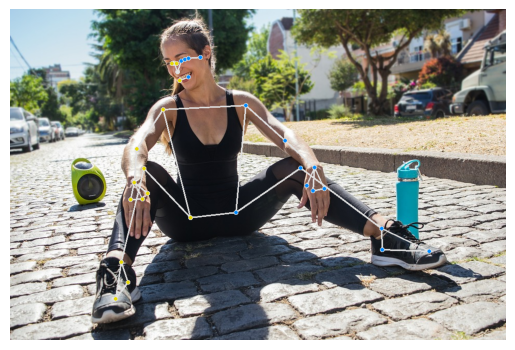

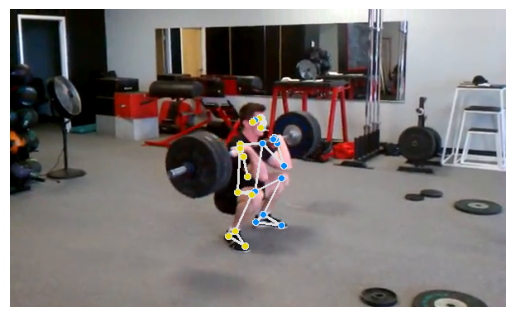

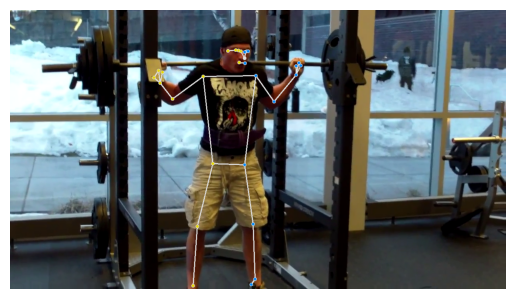

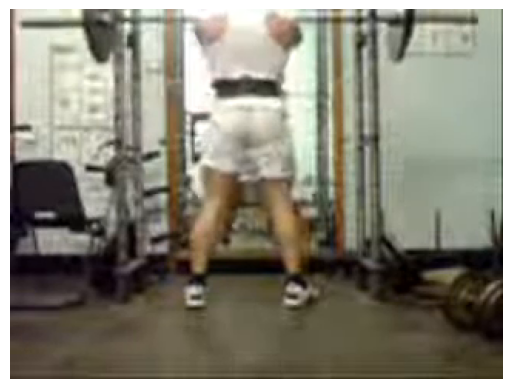

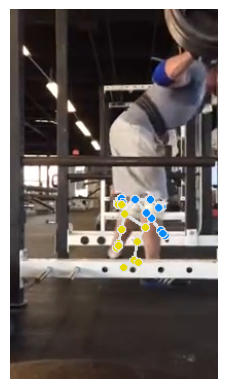

In [46]:
# Usage
mp_detector = mp_init_detector()
mp_image = mp.Image.create_from_file("sample-frames/mp_example.png")
detection_results, body_parts = mp_process_image(
    mp_detector,
    mp_image
)

left_food_index = body_parts['left_foot_index']
print("Left foot index")
print(f"position: {left_food_index.x:.3f}, {left_food_index.y:.3f}, {left_food_index.z:.3f}")
print(f"visibility: {left_food_index.visibility:.3f}")

# Debug
mp_debug_show_image(mp_detector,"sample-frames/mp_example.png")
mp_debug_show_image(mp_detector,"sample-frames/good1.png")
mp_debug_show_image(mp_detector,"sample-frames/good2.png")

mp_debug_show_image(mp_detector,"sample-frames/bad1.png")
mp_debug_show_image(mp_detector,"sample-frames/bad2.png")

### **Push Up Detection**

In [15]:
def calculate_angle(a, b, c, img_rgb=None, color=(255, 0, 0), text_scale=4.0):
    a = np.array([a.x, a.y, a.z])
    b = np.array([b.x, b.y, b.z])
    c = np.array([c.x, c.y, c.z])

    radians = np.arctan2(c[1] - b[1], c[0] - b[0]) - np.arctan2(a[1] - b[1], a[0] - b[0])
    angle = np.abs(radians * 180.0 / np.pi)

    if angle > 180.0:
        angle = 360 - angle

    if img_rgb is not None:
        height, width, _ = img_rgb.shape

        # Scale the coordinates to fit the image dimensions
        points = [
            (int(a[0] * width), int(a[1] * height)),
            (int(b[0] * width), int(b[1] * height)),
            (int(c[0] * width), int(c[1] * height))
        ]

        # Adjust text size based on the image height
        text_size = text_scale * height / 1000

        cv2.line(img_rgb, points[0], points[1], color, 4)
        cv2.line(img_rgb, points[1], points[2], color, 4)
        cv2.putText(
            img_rgb,
            str(int(angle)),
            (points[1][0] + 10, points[1][1] - 25),
            cv2.FONT_HERSHEY_SIMPLEX,
            text_size,
            color,
            2
        )
        return angle, img_rgb

    return angle

def do_pushup(body_parts, vis_threshold=0.75, img_rgb=None):
    required_parts = [
        'left_shoulder', 'left_elbow', 'left_wrist',
        'right_shoulder', 'right_elbow', 'right_wrist',
        'left_hip', 'right_hip', 'left_knee', 'right_knee',
        'left_ankle', 'right_ankle'
    ]

    # Check if any required body part is None
    for part in required_parts:
        if body_parts[part].visibility == 0:
            return -1, img_rgb

    l_sh = body_parts['left_shoulder']
    l_elbow = body_parts['left_elbow']
    l_wrist = body_parts['left_wrist']
    r_sh = body_parts['right_shoulder']
    r_elbow = body_parts['right_elbow']
    r_wrist = body_parts['right_wrist']
    l_hip = body_parts['left_hip']
    r_hip = body_parts['right_hip']
    l_ankle = body_parts['left_ankle']
    r_ankle = body_parts['right_ankle']

    # Get visibility of left and right sides
    # Left arm and leg
    l_vis = l_wrist.visibility + l_elbow.visibility + l_sh.visibility + l_ankle.visibility + l_hip.visibility
    l_vis = l_vis / 5

    # Right arm and leg
    r_vis = r_wrist.visibility + r_elbow.visibility + r_sh.visibility + r_ankle.visibility + r_hip.visibility
    r_vis = r_vis / 5

    # Visibility (assuming 1 arm/ankle will always be obstructed)
    if l_vis < vis_threshold and r_vis >= vis_threshold:
        t_sh, t_elbow, t_wrist = r_sh, r_elbow, r_wrist
        t_hip, t_ankle = r_hip, r_ankle
    elif r_vis < vis_threshold and l_vis >= vis_threshold:
        t_sh, t_elbow, t_wrist = l_sh, l_elbow, l_wrist
        t_hip, t_ankle = l_hip, l_ankle
    elif l_vis < vis_threshold and r_vis < vis_threshold:
        return -1, img_rgb
    else:
        t_sh, t_elbow, t_wrist = l_sh, l_elbow, l_wrist
        t_hip, t_ankle = l_hip, l_ankle

    # Calculate angles
    shoulder_angle, img1 = calculate_angle(t_hip, t_sh, t_elbow, img_rgb, (255, 0, 0))
    elbow_angle, img2 = calculate_angle(t_sh, t_elbow, t_wrist, img1, (0, 255, 0))
    hip_angle, img3 = calculate_angle(t_sh, t_hip, t_ankle, img2, (0, 0, 255))

    print(f"Shoulder Angle: {shoulder_angle}")
    print(f"Elbow Angle: {elbow_angle}")
    print(f"Hip Angle: {hip_angle}")

    if 50 < shoulder_angle < 70 and 160 < elbow_angle < 180 and 160 < hip_angle < 180:
        # Raised pushup
        return 2, img3
    elif 0 < shoulder_angle < 20 and 80 < elbow_angle < 100 and 160 < hip_angle < 180:
        # Lower pushup
        return 1, img3
    else:
        # Bad posture
        return 0, img3


### Bench Press Detection

In [16]:
def do_bench_press(body_parts, vis_threshold=0.75, img_rgb=None):
    required_parts = [
        'left_shoulder', 'left_elbow', 'left_wrist', 'left_hip',
        'right_shoulder', 'right_elbow', 'right_wrist', 'right_hip'
    ]

    # Check if any required body part is None
    for part in required_parts:
        if body_parts[part].visibility == 0:
            return -1, img_rgb

    l_sh = body_parts['left_shoulder']
    l_elbow = body_parts['left_elbow']
    l_wrist = body_parts['left_wrist']
    l_hip = body_parts['left_hip']
    r_sh = body_parts['right_shoulder']
    r_elbow = body_parts['right_elbow']
    r_wrist = body_parts['right_wrist']
    r_hip = body_parts['right_hip']

    # Get visibility of left and right sides
    # Left side
    l_vis = (l_wrist.visibility + l_elbow.visibility + l_sh.visibility + l_hip.visibility) / 4
    # Right side
    r_vis = (r_wrist.visibility + r_elbow.visibility + r_sh.visibility + r_hip.visibility) / 4

    # Visibility (assuming one side will always be obstructed)
    if l_vis < vis_threshold and r_vis >= vis_threshold:
        t_sh, t_elbow, t_wrist, t_hip = r_sh, r_elbow, r_wrist, r_hip
    elif r_vis < vis_threshold and l_vis >= vis_threshold:
        t_sh, t_elbow, t_wrist, t_hip = l_sh, l_elbow, l_wrist, l_hip
    elif l_vis < vis_threshold and r_vis < vis_threshold:
        return -1, img_rgb
    else:
        t_sh, t_elbow, t_wrist, t_hip = l_sh, l_elbow, l_wrist, l_hip

    # Calculate angles
    shoulder_angle, img1 = calculate_angle(t_hip, t_sh, t_elbow, img_rgb, (255, 0, 0))
    elbow_angle, img2 = calculate_angle(t_sh, t_elbow, t_wrist, img1, (0, 255, 0))
    
    print(f"Shoulder Angle: {shoulder_angle}")
    print(f"Elbow Angle: {elbow_angle}")

    if 50 < shoulder_angle < 70 and 160 < elbow_angle < 180:
        # Extended position
        return 2, img2
    elif 0 < shoulder_angle < 20 and 80 < elbow_angle < 100:
        # Flexed position
        return 1, img2
    else:
        # Bad posture
        return 0, img2

### Deadlift Detection

In [17]:
def do_deadlift(body_parts, vis_threshold=0.75, img_rgb=None):
    required_parts = [
        'left_shoulder', 'right_shoulder',
        'left_hip', 'right_hip',
        'left_knee', 'right_knee',
        'left_ankle', 'right_ankle',
        'left_elbow', 'right_elbow',
        'left_food_index', 'right_foot_index'
    ]

    # Check if any required body part is None
    for part in required_parts:
        if body_parts[part].visibility == 0:
            return -1, img_rgb

    l_sh = body_parts['left_shoulder']
    r_sh = body_parts['right_shoulder']
    l_hip = body_parts['left_hip']
    r_hip = body_parts['right_hip']
    l_knee = body_parts['left_knee']
    r_knee = body_parts['right_knee']
    l_ankle = body_parts['left_ankle']
    r_ankle = body_parts['right_ankle']
    l_elbow = body_parts['left_elbow']
    r_elbow = body_parts['right_elbow']
    l_index = body_parts['left_foot_index']
    r_index = body_parts['right_foot_index']

    # Get visibility of left and right sides
    l_vis = (l_sh.visibility + l_hip.visibility + l_knee.visibility + l_ankle.visibility + l_elbow.visibility + l_index.visibility) / 6
    r_vis = (r_sh.visibility + r_hip.visibility + r_knee.visibility + r_ankle.visibility + r_elbow.visibility + r_index.visibility) / 6

    # Use the side with better visibility
    if l_vis < vis_threshold and r_vis >= vis_threshold:
        t_sh, t_hip, t_knee, t_ankle, t_elbow, t_index = r_sh, r_hip, r_knee, r_ankle, r_elbow, r_index
    elif r_vis < vis_threshold and l_vis >= vis_threshold:
        t_sh, t_hip, t_knee, t_ankle, t_elbow, t_index = l_sh, l_hip, l_knee, l_ankle, l_elbow, l_index
    elif l_vis < vis_threshold and r_vis < vis_threshold:
        return -1, img_rgb
    else:
        t_sh, t_hip, t_knee, t_ankle, t_elbow, t_index = l_sh, l_hip, l_knee, l_ankle, l_elbow, l_index

    # Calculate angles correctly
    hip_angle, img1 = calculate_angle(t_sh, t_hip, t_knee, img_rgb, (255, 0, 0))
    knee_angle, img2 = calculate_angle(t_hip, t_knee, t_ankle, img1, (0, 255, 0))
    shoulder_angle, img3 = calculate_angle(t_hip, t_sh, t_elbow, img2, (0, 0, 255))

    print(f"Hip Angle: {hip_angle}")
    print(f"Knee Angle: {knee_angle}")
    print(f"Shoulder Angle: {shoulder_angle}")

    # Define thresholds for correct posture
    correct_hip_angle_range = (160, 180)   # Example range for hip angle
    correct_knee_angle_range = (160, 180)  # Example range for knee angle
    correct_shoulder_angle_range = (70, 110)  # Example range for shoulder angle

    if correct_hip_angle_range[0] < hip_angle < correct_hip_angle_range[1] and \
       correct_knee_angle_range[0] < knee_angle < correct_knee_angle_range[1] and \
       correct_shoulder_angle_range[0] < shoulder_angle < correct_shoulder_angle_range[1]:
        return 1, img3  # Correct posture
    else:
        return 0, img3  # Incorrect posture

### Squat Detection

In [80]:
def do_squat(body_parts, vis_threshold=0.75, img_rgb=None):
    required_parts = [
        'left_shoulder', 'right_shoulder',
        'left_hip', 'right_hip',
        'left_knee', 'right_knee',
        'left_ankle', 'right_ankle',
        'left_heel', 'right_heel'
    ]

    optional_parts = [
        'left_foot_index', 'right_foot_index'
    ]

    # Check if any required body part is None
    for part in required_parts:
        if body_parts[part].visibility == 0:
            return -1, img_rgb

    # Initialize optional parts to None
    for part in optional_parts:
        if part not in body_parts or body_parts[part].visibility == 0:
            body_parts[part] = (0,0,0,0)

    l_sh = body_parts['left_shoulder']
    r_sh = body_parts['right_shoulder']
    l_hip = body_parts['left_hip']
    r_hip = body_parts['right_hip']
    l_knee = body_parts['left_knee']
    r_knee = body_parts['right_knee']
    l_ankle = body_parts['left_ankle']
    r_ankle = body_parts['right_ankle']
    l_heel = body_parts['left_heel']
    r_heel = body_parts['right_heel']
    l_index = body_parts['left_foot_index']
    r_index = body_parts['right_foot_index']

    # Get visibility of left and right sides
    l_vis = (l_sh.visibility + l_hip.visibility + l_knee.visibility + l_ankle.visibility + l_heel.visibility) / 5
    r_vis = (r_sh.visibility + r_hip.visibility + r_knee.visibility + r_ankle.visibility + r_heel.visibility) / 5

    # Use the side with better visibility
    if l_vis < vis_threshold and r_vis >= vis_threshold:
        t_sh, t_hip, t_knee, t_ankle, t_heel, t_index = r_sh, r_hip, r_knee, r_ankle, r_heel, r_index
    elif r_vis < vis_threshold and l_vis >= vis_threshold:
        t_sh, t_hip, t_knee, t_ankle, t_heel, t_index = l_sh, l_hip, l_knee, l_ankle, l_heel, l_index
    elif l_vis < vis_threshold and r_vis < vis_threshold:
        return -1, img_rgb
    else:
        t_sh, t_hip, t_knee, t_ankle, t_heel, t_index = l_sh, l_hip, l_knee, l_ankle, l_heel, l_index

    # Calculate angles correctly
    hip_angle, img1 = calculate_angle(t_sh, t_hip, t_knee, img_rgb, (255, 0, 0))
    knee_angle, img2 = calculate_angle(t_hip, t_knee, t_ankle, img1, (0, 255, 0))
    ankle_angle, img3 = calculate_angle(t_knee, t_ankle, t_heel, img2, (0, 0, 255))

    print(f"Hip Angle: {hip_angle}")
    print(f"Knee Angle: {knee_angle}")
    print(f"Ankle Angle: {ankle_angle}")

    # Calculate the distances between the knees and ankles
    knee_distance = np.linalg.norm([l_knee.x - r_knee.x, l_knee.y - r_knee.y, l_knee.z - r_knee.z])
    ankle_distance = np.linalg.norm([l_ankle.x - r_ankle.x, l_ankle.y - r_ankle.y, l_ankle.z - r_ankle.z])

    # Calculate the ratio and check for knee cave
    if knee_distance / ankle_distance < 0.7:  # Example ratio threshold, adjust as needed
        knee_cave = True
        print("knees are caving in")
        return 0, img2

    # Compare the y-coordinates of the heels and ankles
    print(t_heel.y)
    print(t_ankle.y)
    if t_heel.y > t_ankle.y + 0.05:  # Example condition, adjust threshold as needed
        print("Heels are off the ground")
        return 0, img3  # Incorrect posture

    if 160 < hip_angle < 180 and 160 < knee_angle < 180:
        # extended position
        return 2, img2
    elif 50 < hip_angle < 160 and 50 < knee_angle < 160:
        # flexed position
        return 1, img2
    else:
        # bad posture
        return 0, img2


In [10]:
def pushup_detector_static(img_path, show_keypoints=False, show_angles=True):
    # Mediapipe
    mp_detector = mp_init_detector()
    mp_img = mp.Image.create_from_file(img_path)
    detection_results, body_parts = mp_process_image(
        mp_detector,
        mp_img
    )

    # cv2
    img_rgb = None
    if show_angles:
        img_rgb = cv2.cvtColor(cv2.imread(img_path), cv2.COLOR_BGR2RGB)

    # Body part usage
    if bool(body_parts):
        if show_keypoints:
            mp_debug_show_image(mp_detector, img_path)

        print("Pushup Detector")
        pushup_res, img_with_angles = do_pushup(body_parts, 0.75, img_rgb)
        if pushup_res < 0:
            print(f"WARNING: Low visibility confidence, skipping {img_path}")
        elif pushup_res > 0:
            print("Good posture")
            if pushup_res == 2:
                print("Raised pushup")
            elif pushup_res == 1:
                print("Lowered pushup")
        else:
            print("Bad posture")

        if show_angles and img_with_angles is not None:
            cv2_imshow(cv2.cvtColor(img_with_angles, cv2.COLOR_RGB2BGR))
    else:
        print(f"WARNING: Mediapipe could not detect landmarks, skipping {img_path}")


def pushup_detector_dynamic(frame, detector, show_keypoints=False, show_angles=True):
    mp_img = mp.Image(image_format=mp.ImageFormat.SRGB, data=frame)
    detection_results, body_parts = mp_process_image(detector, mp_img)

    img_rgb = None
    if show_angles:
        img_rgb = frame

    if bool(body_parts):
        # Draw full body landmarks
        if show_keypoints:
            res_frame = draw_landmarks_on_image(img_rgb, detection_results)
            return res_frame, None

        pushup_res, res_frame = do_pushup(body_parts, 0.75, img_rgb)

        if pushup_res > 0:
            print("Good posture")
            if pushup_res == 2:
                return res_frame, "Raised pushup"
            elif pushup_res == 1:
                return res_frame, "Lowered pushup"
        else:
            return res_frame, "Bad posture"

    # If no body parts detected or any other condition, return the frame with a default message
    return frame, "No body parts detected"




In [20]:
def generic_detector_static(img_path, exercise_function, show_keypoints=False, show_angles=True):
    # Mediapipe
    mp_detector = mp_init_detector()
    mp_img = mp.Image.create_from_file(img_path)
    detection_results, body_parts = mp_process_image(
        mp_detector,
        mp_img
    )

    # cv2
    img_rgb = None
    if show_angles:
        img_rgb = cv2.cvtColor(cv2.imread(img_path), cv2.COLOR_BGR2RGB)

    # Body part usage
    if bool(body_parts):
        if show_keypoints:
            mp_debug_show_image(mp_detector, img_path)

        print("Exercise Detector")
        result, img_with_angles = exercise_function(body_parts, 0.75, img_rgb)
        if result < 0:
            print(f"WARNING: Low visibility confidence, skipping {img_path}")
        elif result > 0:
            print("Good posture")
            if result == 2:
                print("Extended position")
            elif result == 1:
                print("Flexed position")
        else:
            print("Bad technique")

        if show_angles and img_with_angles is not None:
            cv2_imshow(cv2.cvtColor(img_with_angles, cv2.COLOR_RGB2BGR))
    else:
        print(f"WARNING: Mediapipe could not detect landmarks, skipping {img_path}")

Exercise Detector
Shoulder Angle: 7.315790216890716
Elbow Angle: 92.58033306638521
Hip Angle: 178.1411768978052
Good posture
Flexed position


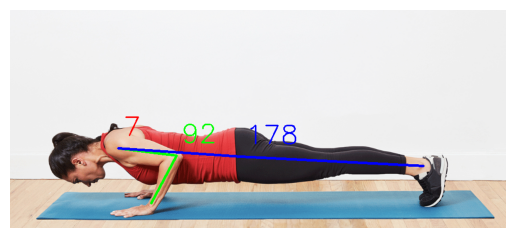

Exercise Detector
Shoulder Angle: 57.24483844590895
Elbow Angle: 174.8654640506102
Hip Angle: 171.55962819102564
Good posture
Extended position


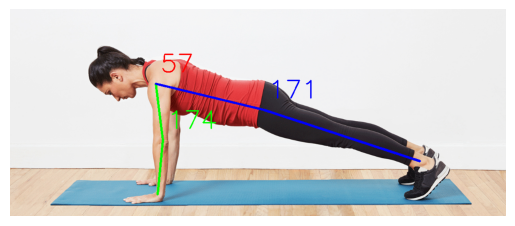

Exercise Detector
Shoulder Angle: 38.155833554221495
Elbow Angle: 168.44650480279657
Hip Angle: 146.15518744032138
Bad posture


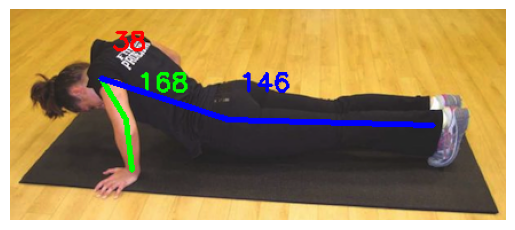

Exercise Detector
Shoulder Angle: 65.904574484246
Elbow Angle: 158.16556693270326
Hip Angle: 177.19224774115096
Bad posture


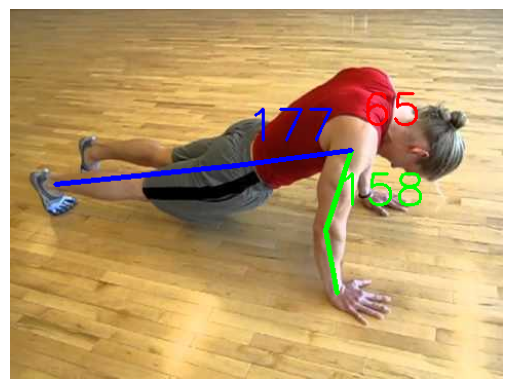

Exercise Detector
Shoulder Angle: 63.26666501172495
Elbow Angle: 177.87430840936102
Hip Angle: 168.5504321740774
Good posture
Extended position


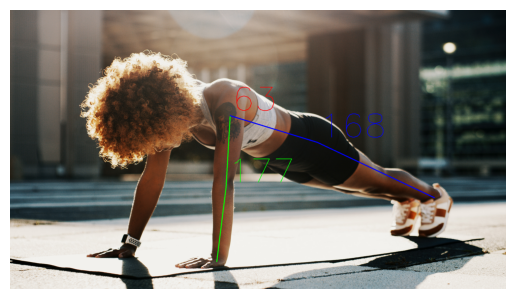

Exercise Detector
Shoulder Angle: 67.66826934915126
Elbow Angle: 172.7801460320142
Hip Angle: 162.16161824077102
Good posture
Extended position


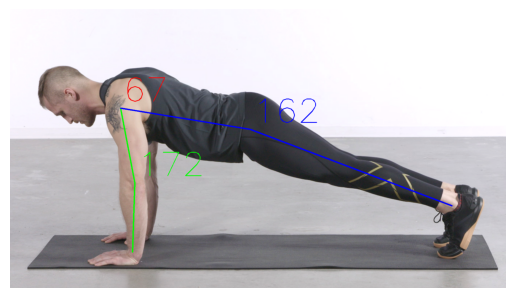

Exercise Detector
Shoulder Angle: 7.291187742612005
Elbow Angle: 84.76032665907769
Hip Angle: 178.0608528975936
Good posture
Flexed position


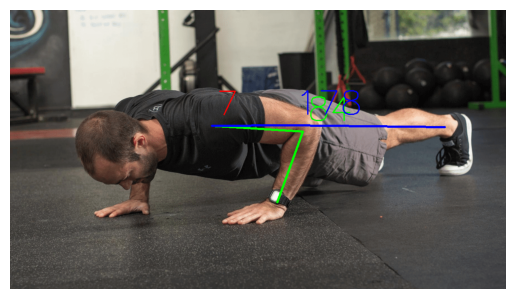

Exercise Detector
Shoulder Angle: 64.21252965983359
Elbow Angle: 175.03394015999
Hip Angle: 170.90297745293864
Good posture
Extended position


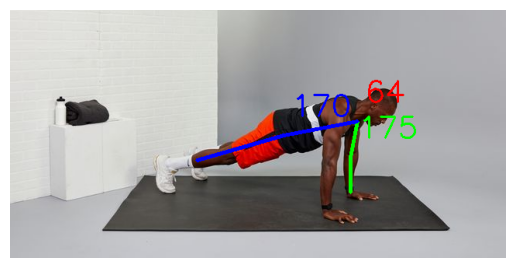

Exercise Detector
Hip Angle: 55.04779430710857
Knee Angle: 57.5277371345973
Ankle Angle: 170.62702500715767
0.8679084777832031
0.832119882106781
Good posture
Flexed position


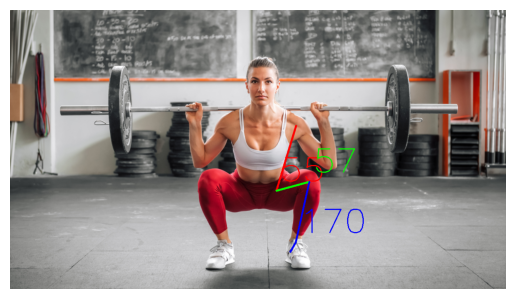

Exercise Detector
Hip Angle: 143.44364579904334
Knee Angle: 158.91061346702134
Ankle Angle: 159.28386053928628
0.8782248497009277
0.852088212966919
Good posture
Flexed position


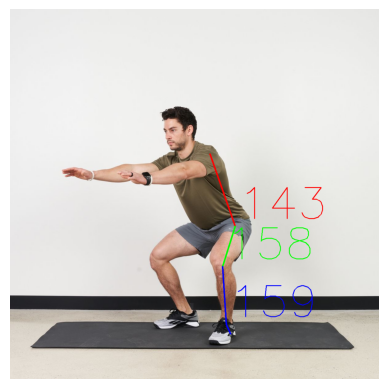

Exercise Detector
Hip Angle: 87.15227202732912
Knee Angle: 83.15689193409071
Ankle Angle: 165.7150957827726
0.8258119225502014
0.794854998588562
Good posture
Flexed position


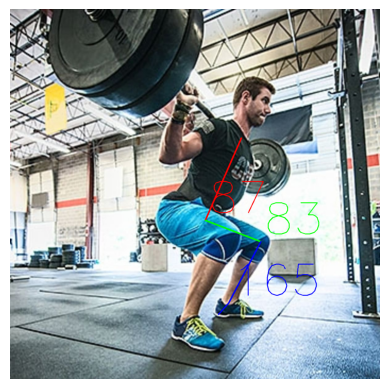

Exercise Detector
Hip Angle: 179.4471091682666
Knee Angle: 171.91087361406787
Ankle Angle: 163.83177845439394
0.9090765714645386
0.8803229331970215
Good posture
Extended position


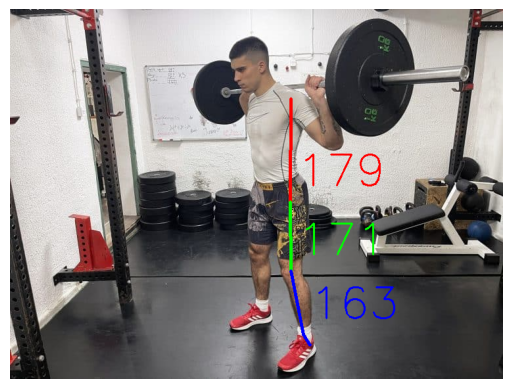

Exercise Detector
Hip Angle: 43.82129136501061
Knee Angle: 87.4347143690797
Ankle Angle: 162.54443593986295
0.8578150272369385
0.8043274879455566
Heels are off the ground
Bad posture


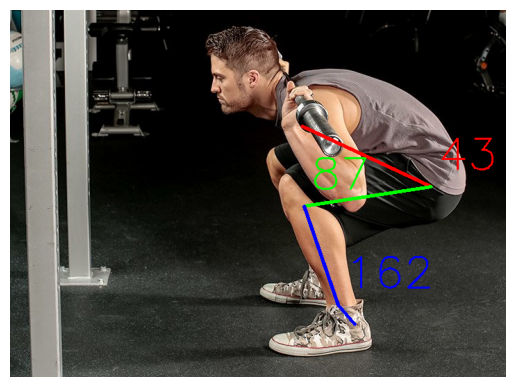

Exercise Detector
Hip Angle: 23.264479131322734
Knee Angle: 80.23401405473237
Ankle Angle: 141.3650580458459
0.6923172473907471
0.6716306805610657
Bad posture


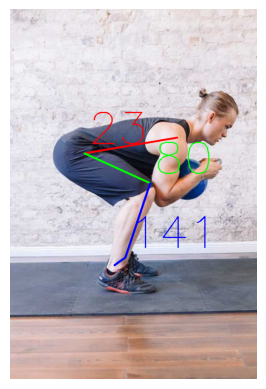

Exercise Detector
Hip Angle: 159.41696417312653
Knee Angle: 113.53151925723358
Ankle Angle: 160.93245964679434
0.854576051235199
0.8377876877784729
Good posture
Flexed position


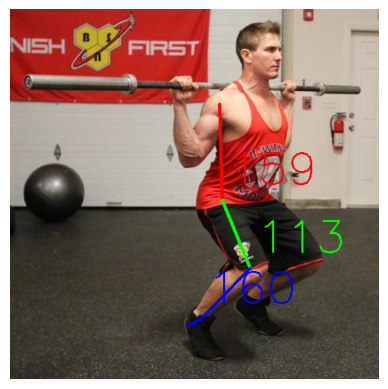

Exercise Detector
Hip Angle: 167.15281798966103
Knee Angle: 171.65097335807292
Ankle Angle: 159.91909895718928
knees are caving in
Bad posture


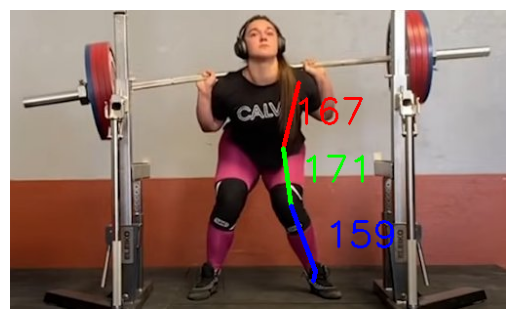

In [82]:
# # Good examples for range of motion
# pushup_detector_static("sample-frames/pushup_rom1.png")
# pushup_detector_static("sample-frames/pushup_rom2.png")

# Pushup (done)
generic_detector_static("sample-frames/pushup_rom1.png", do_pushup)
generic_detector_static("sample-frames/pushup_rom2.png", do_pushup)
generic_detector_static("sample-frames/bad_pushup.png", do_pushup)
generic_detector_static("sample-frames/pushup_bad.jpeg", do_pushup)
generic_detector_static("sample-frames/pushup_good.jpeg", do_pushup)
generic_detector_static("sample-frames/pushup.png", do_pushup)
generic_detector_static("sample-frames/pushup2.png", do_pushup)
generic_detector_static("sample-frames/raised_pushup.jpeg", do_pushup)

#squats
generic_detector_static("sample-frames-squats/good_squat.png", do_squat)
generic_detector_static("sample-frames-squats/good_squat2.jpg", do_squat)
generic_detector_static("sample-frames-squats/good_squat3.jpg", do_squat)
generic_detector_static("sample-frames-squats/good_squat4.jpg", do_squat)
generic_detector_static("sample-frames-squats/bad_squat1.jpg", do_squat)
generic_detector_static("sample-frames-squats/bad_squat2.jpg", do_squat)
generic_detector_static("sample-frames-squats/bad_squat3.jpg", do_squat)
generic_detector_static("sample-frames-squats/bad_squat4.jpeg", do_squat)


# **Webcam**

In [12]:
def run_webcam():
    detector = mp_init_detector()

    cap = cv2.VideoCapture(0)

    while cap.isOpened():
        success, frame = cap.read()
        if not success:
            continue

        frame, guide = pushup_detector_dynamic(frame, detector, show_keypoints=False, show_angles=True)

        # Display the classification and guide on the top right of the frame
        text_x = frame.shape[1] - 300  # Adjust x position based on frame width
        classification = "Pushup"
        cv2.putText(frame, classification, (text_x, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 0), 2, cv2.LINE_AA)
        if guide:
            cv2.putText(frame, guide, (text_x, 60), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 0), 2, cv2.LINE_AA)

        # Display the frame
        cv2.imshow('Pushup Detector', frame)

        if cv2.waitKey(5) & 0xFF == ord('q'):
            break

    cap.release()
    cv2.destroyAllWindows()

# NOTE: Hold q to close the webcam
run_webcam()


Shoulder Angle: 21.925988111770796
Elbow Angle: 178.70600437312672
Hip Angle: 172.7993013980403
Shoulder Angle: 24.02937255629318
Elbow Angle: 170.65814897014218
Hip Angle: 168.01551339291845
Shoulder Angle: 14.29223612815311
Elbow Angle: 147.22883338967534
Hip Angle: 179.5167928708703
Shoulder Angle: 19.88165427973851
Elbow Angle: 146.36394237649378
Hip Angle: 177.10420083087175
Shoulder Angle: 14.48931535387732
Elbow Angle: 149.8289476314228
Hip Angle: 176.86769288509123
Shoulder Angle: 21.437965502775057
Elbow Angle: 170.42486291544625
Hip Angle: 174.71851296609034
Shoulder Angle: 23.199434070966923
Elbow Angle: 172.9655891207557
Hip Angle: 174.65496295390528
Shoulder Angle: 25.208635324808316
Elbow Angle: 172.02455951346846
Hip Angle: 174.95942200918267
Shoulder Angle: 23.45791448402349
Elbow Angle: 167.56858726449892
Hip Angle: 175.3235289007339
Shoulder Angle: 19.21295088337452
Elbow Angle: 174.08275944819286
Hip Angle: 174.0549638339238
Shoulder Angle: 22.083711640540567
Elbow A

KeyboardInterrupt: 

: 